In [89]:
# pip install ucimlrepo
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.stats import pearsonr

data = pd.read_csv('data.csv', sep=';', engine = 'python')
data.reset_index
# data = data[(data['Target'] == 'Dropout') | (data['Target'] == 'Graduate')]
# data = data.query("Target != 'Enrolled'")
data['Target'] = data['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled': 1})

r = []
for i in data.columns:
    print(i, pearsonr(data[i], data['Target']))
df = df.drop(columns=['Application mode', 'Application order', 'International', 'Debtor', 'Marital status', 'Displaced', 'Nacionality', 'Father\'s qualification', 'Mother\'s qualification', 'Father\'s occupation', 'Father\'s qualification', 'Mother\'s occupation', 'Mother\'s qualification', 'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)


Marital status PearsonRResult(statistic=-0.09371217171372184, pvalue=4.235899474921001e-10)
Application mode PearsonRResult(statistic=-0.19845800311336698, pvalue=1.567256442989193e-40)
Application order PearsonRResult(statistic=0.07048539840031134, pvalue=2.6959810866203215e-06)
Course PearsonRResult(statistic=0.03367645668899438, pvalue=0.025095482960224912)
Daytime/evening attendance	 PearsonRResult(statistic=0.08049877148123344, pvalue=8.25718601371573e-08)
Previous qualification PearsonRResult(statistic=-0.04937858909634963, pvalue=0.0010183701921095743)
Previous qualification (grade) PearsonRResult(statistic=0.07820770021249168, pvalue=1.905277029677867e-07)
Nacionality PearsonRResult(statistic=-0.00834582696935985, pvalue=0.578921956054711)
Mother's qualification PearsonRResult(statistic=-0.06495791634375014, pvalue=1.5329337667581757e-05)
Father's qualification PearsonRResult(statistic=-0.01829450946899506, pvalue=0.22376271576301238)
Mother's occupation PearsonRResult(statisti

/var/folders/1d/tqxf7wg949d9cffwxmfhx68r0000gn/T/ipykernel_97154/2965030111.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


KeyError: '[\'Application mode\', \'Application order\', \'International\', \'Debtor\', \'Marital status\', \'Displaced\', \'Nacionality\', "Father\'s qualification", "Mother\'s qualification", "Father\'s qualification", "Mother\'s occupation", "Mother\'s qualification"] not found in axis'

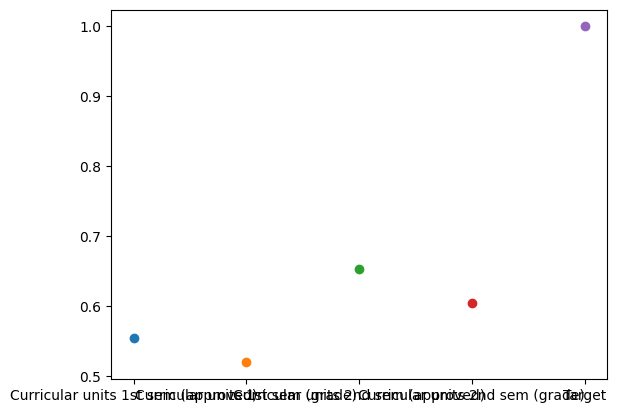

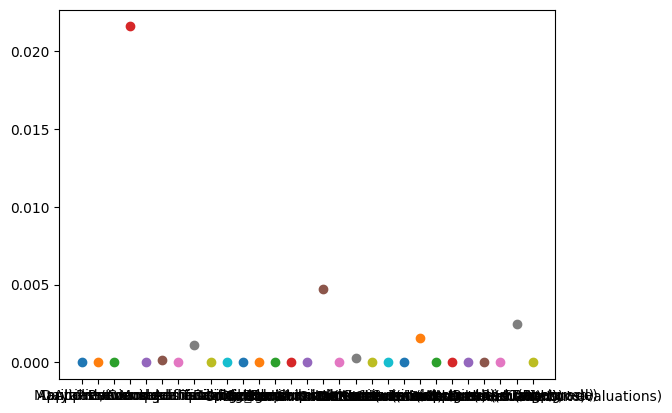

['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Target']


In [14]:
import matplotlib.pyplot as plt
q = []
for i in data.columns:
    a = pearsonr(data[i], data['Target']).statistic
    if a > 0.5:
        q.append(i)
        plt.scatter(i, a)
plt.show()
for i in data.columns:
    a = pearsonr(data[i], data['Target']).pvalue
    if a < 0.05:
        plt.scatter(i, a)
plt.show()
print(q)


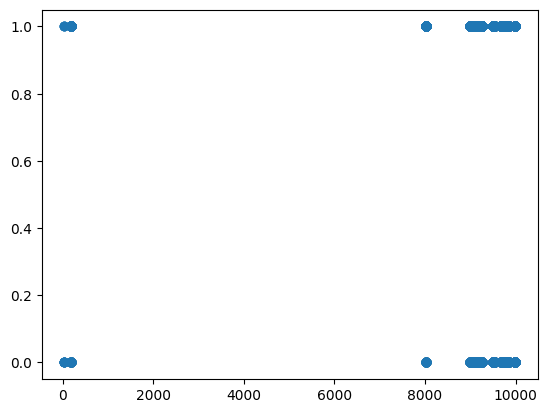

In [28]:
plt.scatter(data["Course"], data['Target'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='Curricular units 1st sem (grade)', ylabel='count'>

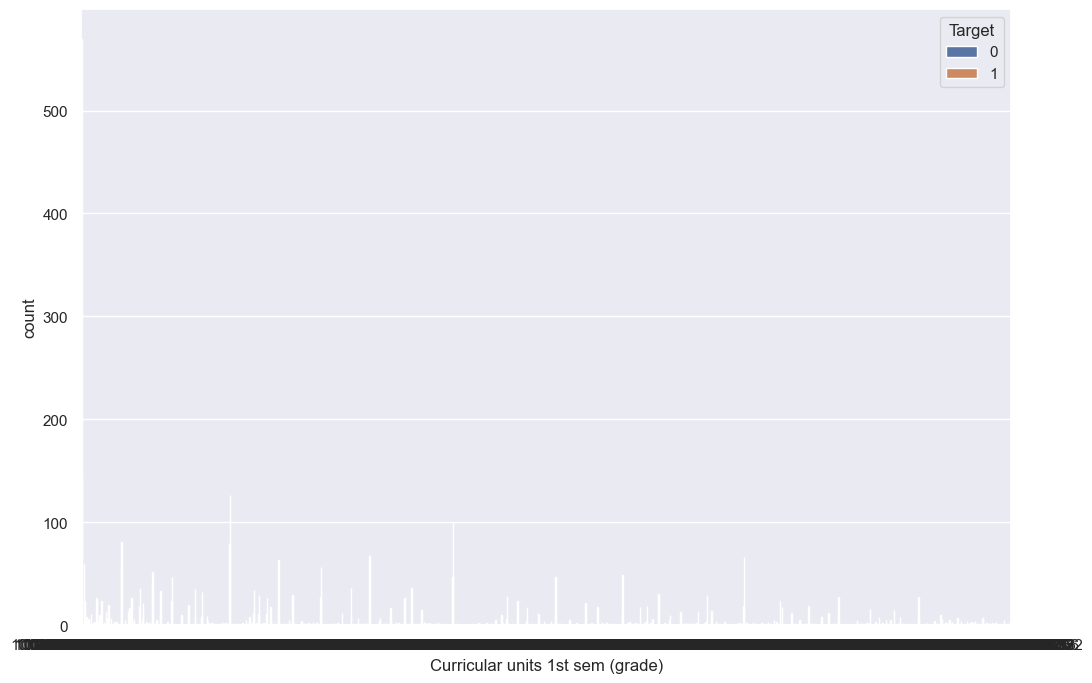

In [33]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 8)})

sns.countplot(x=data['Curricular units 1st sem (grade)'], hue=data['Target'])

In [67]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

x = data.drop(columns=['Target'], axis=1)
y = data['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

modelRandomForestClassifier = RandomForestClassifier()
modelRandomForestClassifier.fit(x_train, y_train)

y_prediction =  modelRandomForestClassifier.predict(x_test)
score = accuracy_score(y_test, y_prediction)
print(score)

0.8610169491525423


In [68]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.42174953627015505
Coefficients: 
 [-5.15429963e-06 -2.51248248e-03  1.22989064e-03 -2.75847539e-04
  1.64792845e-04 -4.73448741e-02  2.92186683e-01 -1.97061006e-02
  3.24165579e-02 -3.35583161e-03 -2.54155839e-02  1.18806804e-02
 -7.44933001e-04  3.54557154e-02 -7.50782473e-03  4.96898234e-03
 -2.13049020e-02 -8.71486904e-02  5.04968789e-03  9.23163029e-02
  1.02293617e-02  1.01606852e-02]


In [69]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:16:24   Log-Likelihood:                -1184.6
No. Observations:                4424   AIC:                             2443.
Df Residuals:                    4387   BIC:                             2680.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# Data Processing

### Determine Colinearity 

In [75]:
x_test = data.drop(columns=['Target'], axis=1)

vif_data = pd.DataFrame() 
vif_data["feature"] = x_test.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_test.values, i) 
                          for i in range(len(x_test.columns))] 
  
print(vif_data)

                                           feature         VIF
0                                   Marital status    6.820147
1                                 Application mode    3.886030
2                                Application order    3.322073
3                                           Course   41.129647
4                     Daytime/evening attendance\t   11.716339
5                           Previous qualification    1.586275
6                   Previous qualification (grade)  129.826257
7                                      Nacionality    2.892292
8                           Mother's qualification    3.950031
9                           Father's qualification    4.497412
10                             Mother's occupation    6.999383
11                             Father's occupation    7.094308
12                                 Admission grade  116.617629
13                                       Displaced    2.827814
14                       Educational special needs    1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


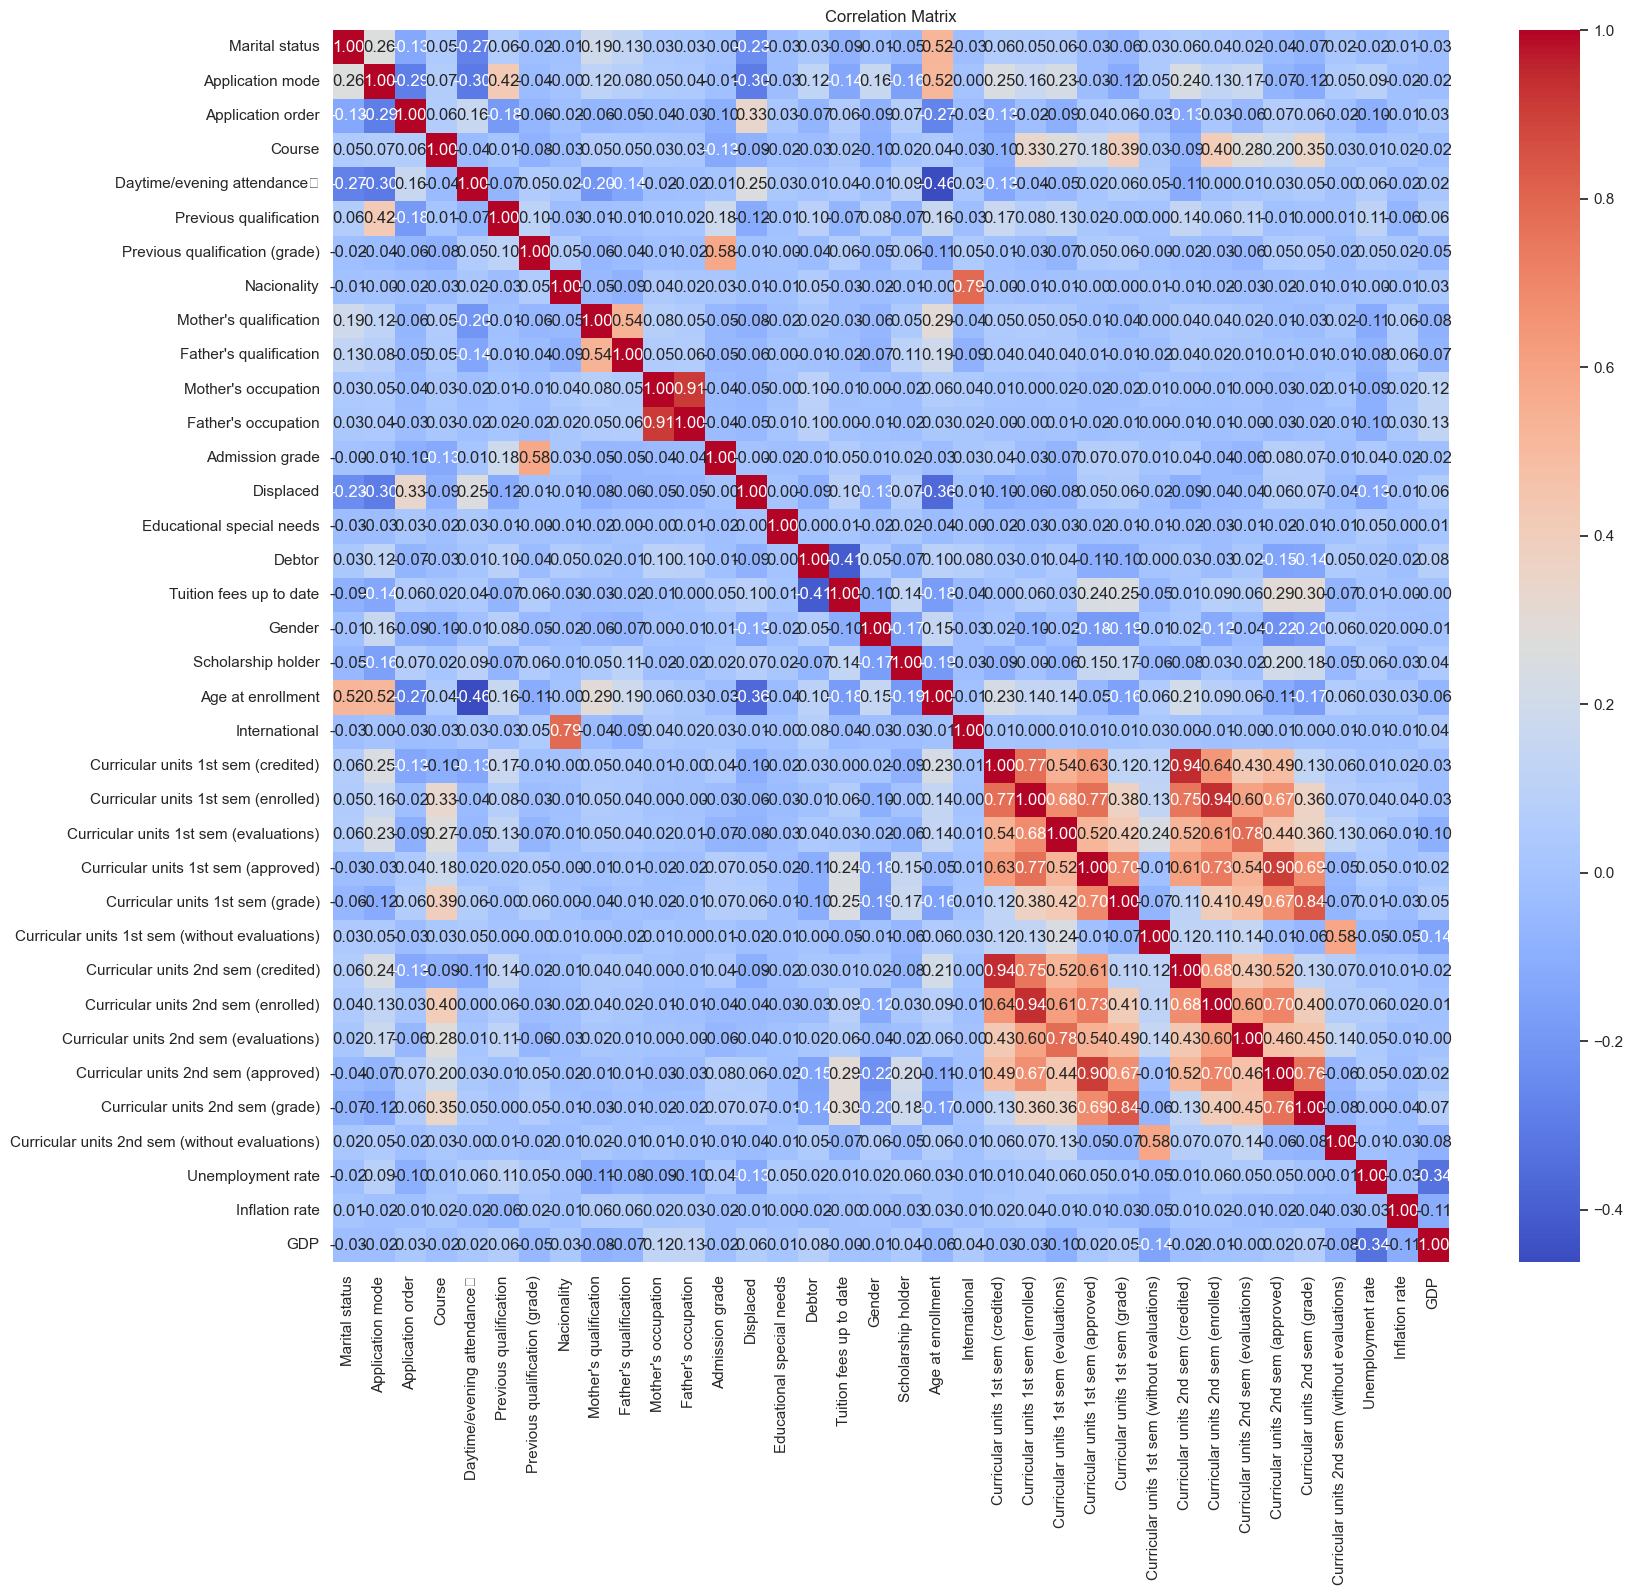

In [79]:
correlation_matrix = x_test.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


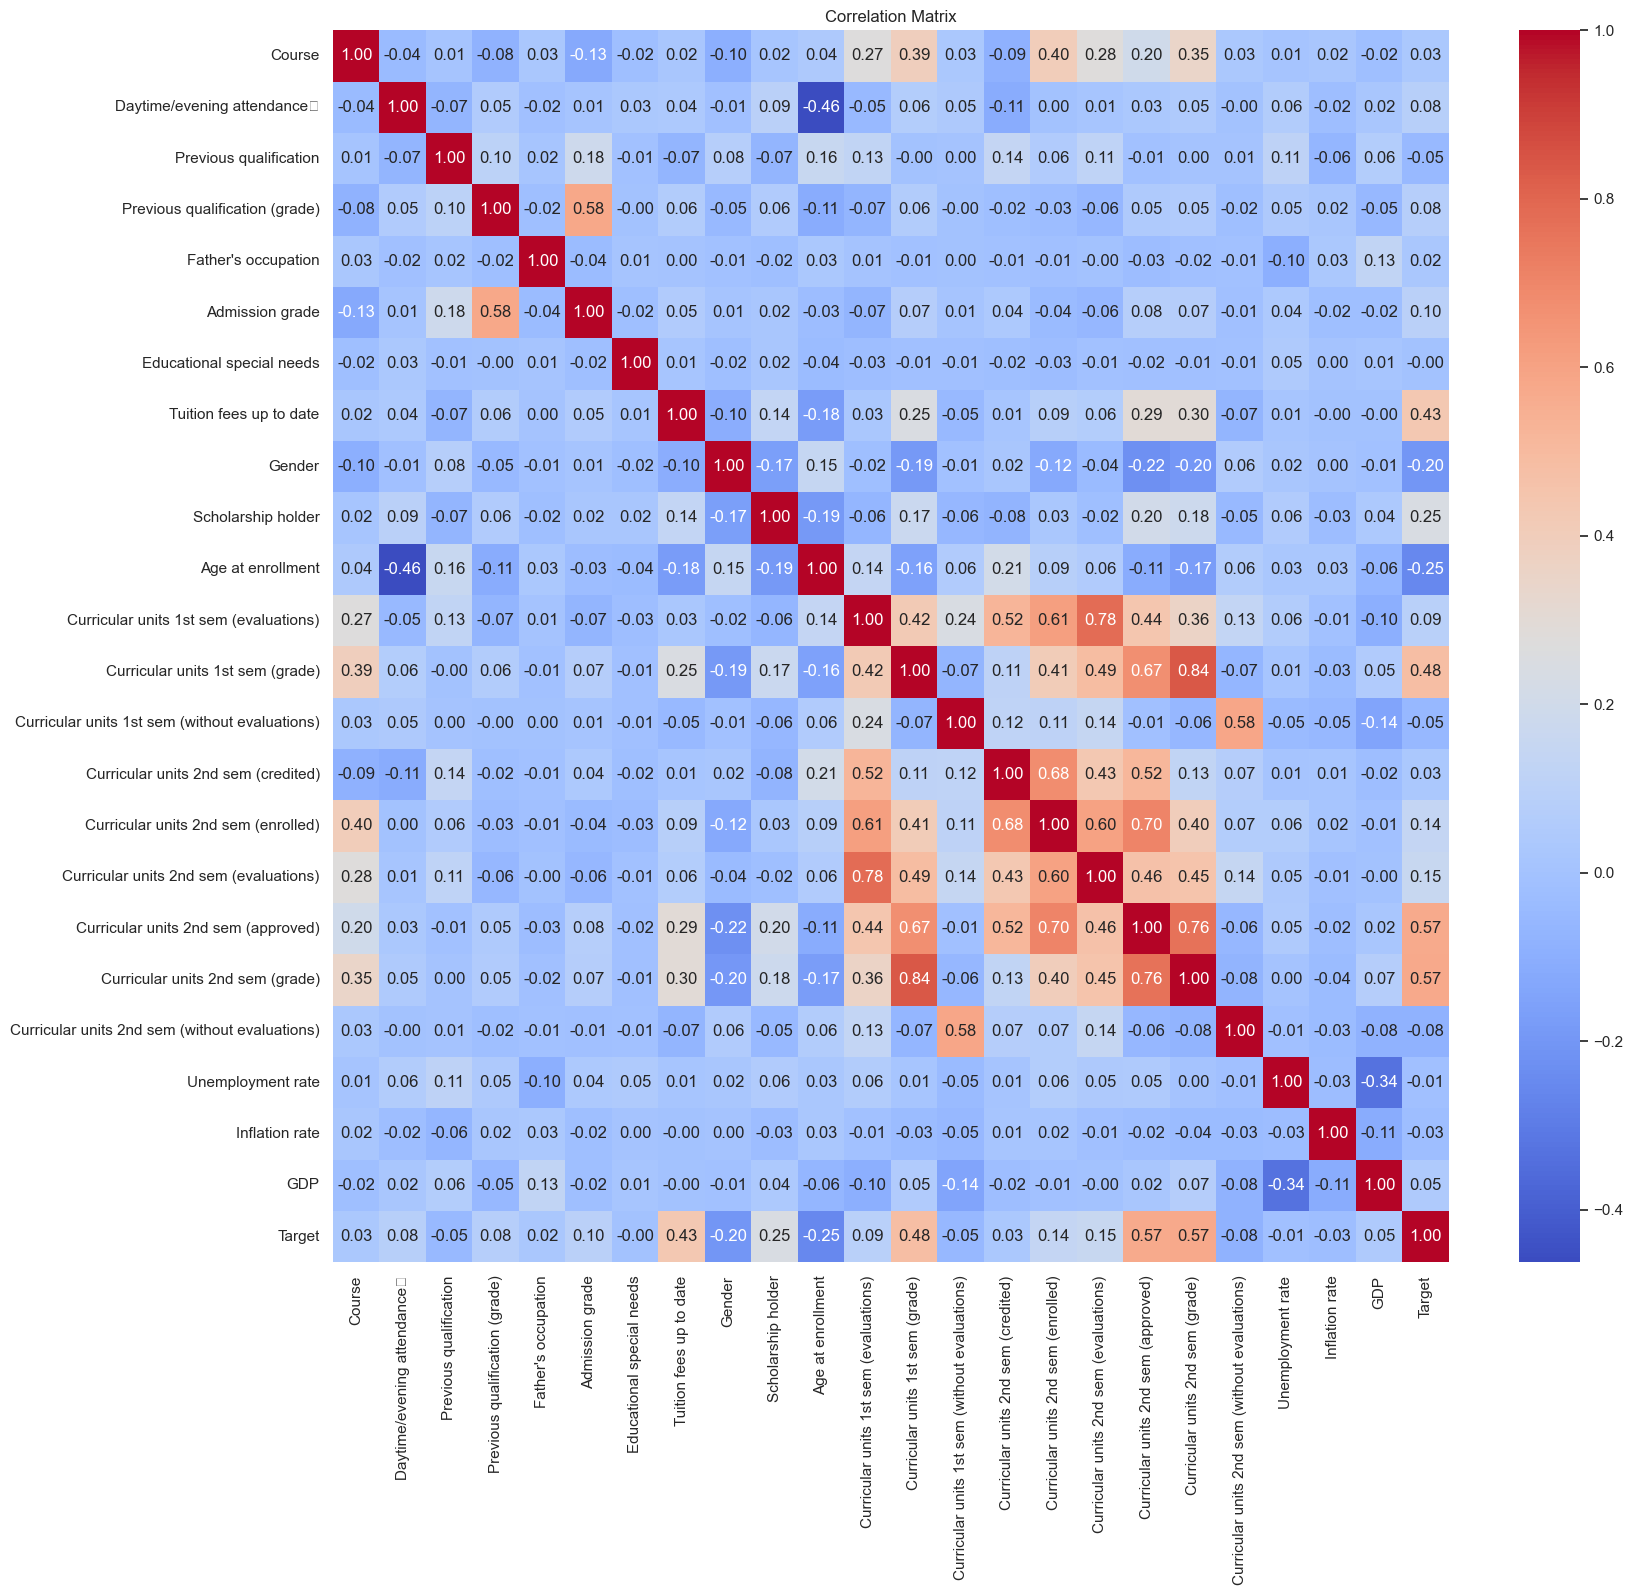

                                           feature         VIF
0                                           Course   37.915725
1                     Daytime/evening attendance\t   11.057965
2                           Previous qualification    1.335309
3                   Previous qualification (grade)  127.833712
4                              Father's occupation    1.231161
5                                  Admission grade  114.919084
6                        Educational special needs    1.019200
7                          Tuition fees up to date   10.197349
8                                           Gender    1.726846
9                               Scholarship holder    1.521085
10                               Age at enrollment   13.458259
11          Curricular units 1st sem (evaluations)   16.345291
12                Curricular units 1st sem (grade)   22.641894
13  Curricular units 1st sem (without evaluations)    1.764594
14             Curricular units 2nd sem (credited)    3

In [84]:
x_test = data.drop(columns=['Application mode', 'Application order', 'International', 'Debtor', 'Marital status', 'Displaced', 'Nacionality', 'Father\'s qualification', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)'], axis=1)
correlation_matrix = x_test.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

vif_data = pd.DataFrame() 
vif_data["feature"] = x_test.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_test.values, i) 
                          for i in range(len(x_test.columns))] 
  
print(vif_data)

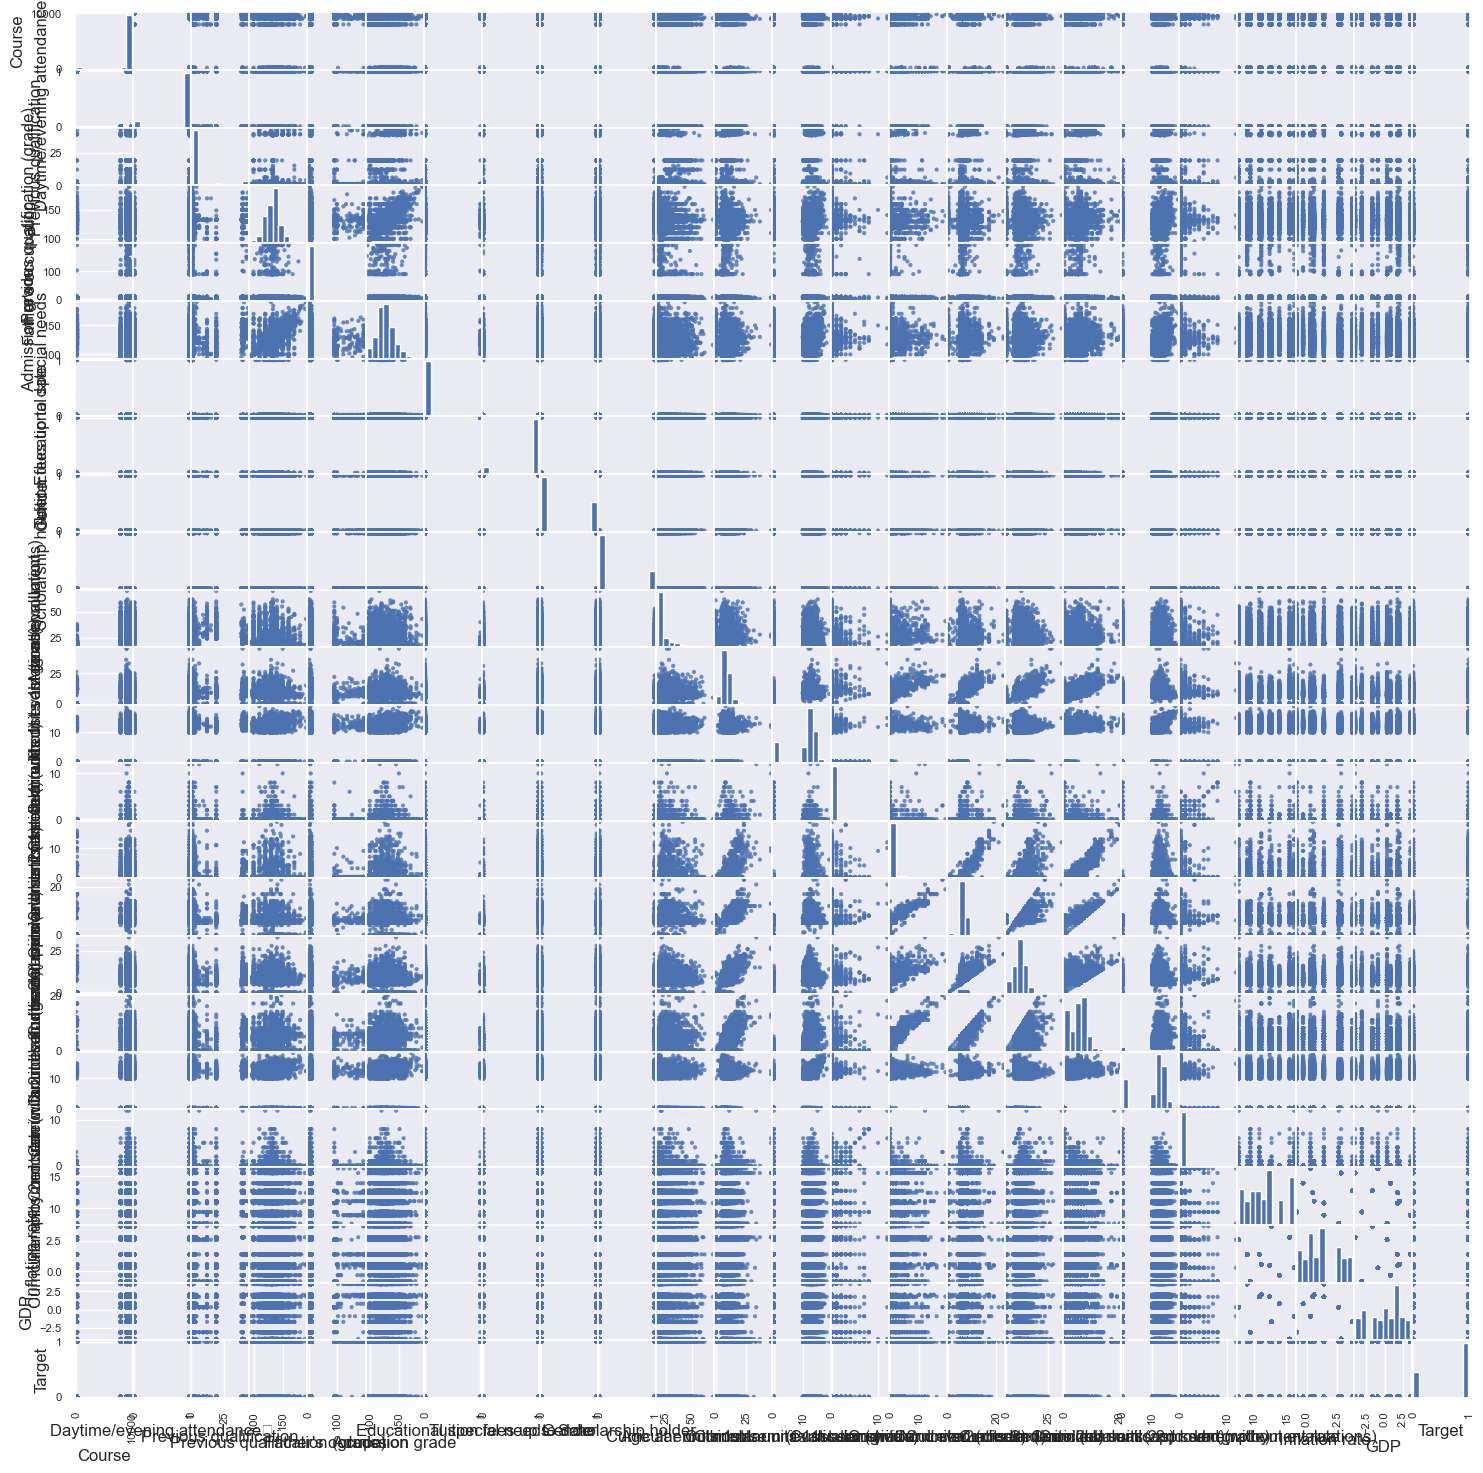

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
df = x_test

scatter_matrix(df, alpha=0.8, figsize=(18, 18), diagonal='hist')
plt.show()

### Train Random Forest Classifier Model

In [91]:
x_test = data.drop(columns=['Application mode', 'Target', 'Application order', 'International', 'Debtor', 'Marital status', 'Displaced', 'Nacionality', 'Father\'s qualification', 'Mother\'s qualification', 'Father\'s occupation', 'Father\'s qualification', 'Mother\'s occupation', 'Mother\'s qualification', 'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)

x = x_test
y = data['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

modelRandomForestClassifier = RandomForestClassifier()
modelRandomForestClassifier.fit(x_train, y_train)

y_prediction =  modelRandomForestClassifier.predict(x_test)
score = accuracy_score(y_test, y_prediction)
print(score)


0.8531073446327684
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:00:47   Log-Likelihood:                -1220.5
No. Observations:                4424   AIC:                             2487.
Df Residuals:                    4401   BIC:                             2634.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

### Train Decision Tree Classifier Model

In [92]:
from sklearn.tree import DecisionTreeClassifier
modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(x_train, y_train)
x_test_prediction_decision_tree = modelDecisionTree.predict(x_test)
testingAccuracyDecisionTree = accuracy_score(y_test, x_test_prediction_decision_tree)
testingAccuracyDecisionTree

0.7774011299435029

### Train Support Vector Machine Model

In [97]:
from sklearn import svm
modelSVM = svm.SVC()
modelSVM.fit(x_train, y_train)
x_test_prediction_svm = modelSVM.predict(x_test)
testingAccuracySVM = accuracy_score(y_test, x_test_prediction_svm)
testingAccuracySVM

0.6429378531073446

### Train Linear Regression Classifier Model

In [103]:
from sklearn.linear_model import LinearRegression
modelLinear = LinearRegression()
modelLinear.fit(x_train, y_train)
x_test_prediction_linear = modelLinear.predict(x_test)
r2_score = modelLinear.score(x_test, y_test)
r2_score

0.5037851745605526